In [ ]:
from itertools import cycle
import warnings
warnings.filterwarnings(action='ignore', category=RuntimeWarning)

from matplotlib import pyplot as plt
import numpy as np

from sklearn.base import clone
from sklearn.datasets import load_breast_cancer, load_digits

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

import active_learning
from active_learning.active_learning import _actively_learn as actively_learn
from active_learning.utils import *
from active_learning.query_strats import random_sampling, uncertainty_sampling, active_search

%matplotlib inline
%load_ext autoreload
%autoreload 2
%aimport make_models
%aimport active_learning

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load toy data

In [146]:
# we'll turn this into a binary classification task looking for the twos
X, y = load_digits(return_X_y=True)
y = (y == 2).astype(int)

# Training Models

In [147]:
# use KNN with 5 neighbors as base classifier to actively learn
base_clf = KNeighborsClassifier()

# Make 30 queries
train_size = 30

### Random Sampling

In [148]:
# I'm setting init_L_size to 5 because KNN can't be fit to fewer than n_neighbors points
random_experiment_data = perform_experiment(
    X, y, 
    base_estimator=clone(base_clf), 
    query_strat=random_sampling,
    n_queries=train_size,
    init_L_size=5
)

Query 0 / 30
Query 1 / 30
Query 2 / 30
Query 3 / 30
Query 4 / 30
Query 5 / 30
Query 6 / 30
Query 7 / 30
Query 8 / 30
Query 9 / 30
Query 10 / 30
Query 11 / 30
Query 12 / 30
Query 13 / 30
Query 14 / 30
Query 15 / 30
Query 16 / 30
Query 17 / 30
Query 18 / 30
Query 19 / 30
Query 20 / 30
Query 21 / 30
Query 22 / 30
Query 23 / 30
Query 24 / 30
Query 25 / 30
Query 26 / 30
Query 27 / 30
Query 28 / 30
Query 29 / 30


### Uncertainty Sampling

In [149]:
uncertainty_experiment_data = perform_experiment(
    X, y,
    base_estimator=clone(base_clf),
    query_strat=uncertainty_sampling,
    n_queries=train_size,
    init_L_size=5
)

Query 0 / 30
Query 1 / 30
Query 2 / 30
Query 3 / 30
Query 4 / 30
Query 5 / 30
Query 6 / 30
Query 7 / 30
Query 8 / 30
Query 9 / 30
Query 10 / 30
Query 11 / 30
Query 12 / 30
Query 13 / 30
Query 14 / 30
Query 15 / 30
Query 16 / 30
Query 17 / 30
Query 18 / 30
Query 19 / 30
Query 20 / 30
Query 21 / 30
Query 22 / 30
Query 23 / 30
Query 24 / 30
Query 25 / 30
Query 26 / 30
Query 27 / 30
Query 28 / 30
Query 29 / 30


### Active Search

In [152]:
as_experiment_data = perform_experiment(
    X, y,
    base_estimator=clone(base_clf),
    query_strat=active_search,
    n_queries=train_size,
    init_L_size=5
)

Query 0 / 30
Query 1 / 30
Query 2 / 30
Query 3 / 30
Query 4 / 30
Query 5 / 30
Query 6 / 30
Query 7 / 30
Query 8 / 30
Query 9 / 30
Query 10 / 30
Query 11 / 30
Query 12 / 30
Query 13 / 30
Query 14 / 30
Query 15 / 30
Query 16 / 30
Query 17 / 30
Query 18 / 30
Query 19 / 30
Query 20 / 30
Query 21 / 30
Query 22 / 30
Query 23 / 30
Query 24 / 30
Query 25 / 30
Query 26 / 30
Query 27 / 30
Query 28 / 30
Query 29 / 30


# Compare

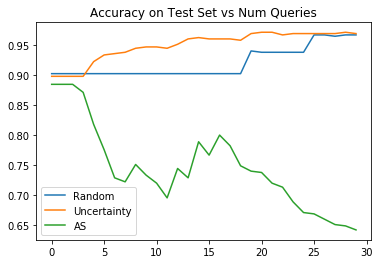

In [155]:
plt.plot(np.arange(train_size), random_experiment_data["accuracies"], label="Random")
plt.plot(np.arange(train_size), uncertainty_experiment_data["accuracies"], label="Uncertainty")
plt.plot(np.arange(train_size), as_experiment_data["accuracies"], label="AS")

plt.title("Accuracy on Test Set vs Num Queries")
plt.legend()

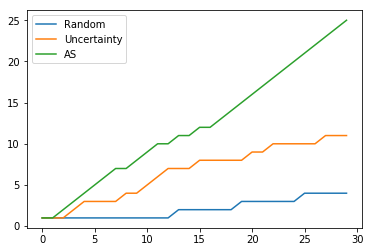

In [154]:
plt.plot(np.arange(train_size), random_experiment_data["history"], label="Random")
plt.plot(np.arange(train_size), uncertainty_experiment_data["history"], label="Uncertainty")
plt.plot(np.arange(train_size), as_experiment_data["history"], label="AS")

plt.title("Number of 2's f")
plt.legend()